In [1]:
!pip install sweetviz

In [2]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!pip install jupyter-contrib-nbextensions

In [272]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [362]:
df = pd.read_csv(r"C:\Users\gharb\OneDrive\Desktop\Datasets\Riyadh\RiyadhVillasAqar.csv")

C:\Users\gharb\AppData\Local\Temp\ipykernel_12456\2524988172.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\gharb\OneDrive\Desktop\Datasets\Riyadh\RiyadhVillasAqar.csv")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [430]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43975 entries, 0 to 46825
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   front         43975 non-null  object 
 1   rooms         43975 non-null  int64  
 2   lounges       43975 non-null  float64
 3   bathrooms     43975 non-null  float64
 4   streetWidth   43975 non-null  float64
 5   stairs        43975 non-null  object 
 6   propertyAge   43975 non-null  int64  
 7   driverRoom    43975 non-null  object 
 8   tent          43975 non-null  object 
 9   patio         43975 non-null  object 
 10  kitchen       43975 non-null  object 
 11  outdoorRoom   43975 non-null  object 
 12  garage        43975 non-null  object 
 13  duplex        43975 non-null  object 
 14  space         43975 non-null  int64  
 15  apartments    43975 non-null  float64
 16  maidRoom      43975 non-null  object 
 17  elevator      43975 non-null  object 
 18  furnihsed     43975 non-null  o

In [576]:
df.describe()

rooms       lounges     bathrooms   streetWidth   propertyAge  \
count  43975.000000  43975.000000  43975.000000  43975.000000  43975.000000   
mean       4.672564      2.347106      4.532371     18.112587      2.319909   
std        1.080031      0.969257      0.809218      3.383581      6.342575   
min        1.000000      1.000000      1.000000      6.000000      0.000000   
25%        4.000000      2.000000      4.000000     15.000000      0.000000   
50%        5.000000      2.000000      5.000000     20.000000      0.000000   
75%        5.000000      3.000000      5.000000     20.000000      0.000000   
max        7.000000      7.000000      5.000000     35.000000     35.000000   

              space    apartments         price  square price  
count  43975.000000  43975.000000  4.397500e+04  43975.000000  
mean     347.578670      0.498147  1.956461e+06   5729.915236  
std      133.255856      0.854621  1.095542e+06   2603.380110  
min      200.000000      0.000000  5.100000e+05    650.000000  
25%      270.000000      0.000000  1.160000e+06   3843.952922  
50%      312.000000      0.000000  1.550000e+06   4922.279793  
75%      378.000000      1.000000  2.500000e+06   7250.000000  
max     1500.000000      4.000000  6.000000e+06  20000.000000

In [578]:
df.shape

(43975, 24)

In [580]:
df.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'location', 'price', 'square price'],
      dtype='object')

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

We chose this dataset because it is available from a trusted platform, "Aqar." Aqar is a platform operated by Aqar Commercial Company, which is registered in the Kingdom of Saudi Arabia and manages and operates the platform's services. It is a reliable platform.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

The dataset for apartments in Riyadh is from 2022, which is relatively recent and suitable for our analysis, ensuring that the insights drawn are relevant.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


### We standardized the data types across the dataset to ensure consistency. Specifically:
1- Changed the data type of each column to the most suitable one .


2 - (converting numerical data stored as text to float).


3 - Converted binary data (0 and 1) to more meaningful labels (Yes and No).


4 - Transformed columns with object data types to float where appropriate, ensuring that all numerical values are properly formatted and ready for analysis.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.

In [365]:
df.drop(columns='Unnamed: 0' , axis = 1 , inplace = True)
df.drop(columns='neighbourhood' , axis = 1 , inplace = True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.

In [366]:
df[df.duplicated()]

front  rooms lounges bathrooms  streetWidth  stairs  \
20     شمالية شرقية      7       2        5+         10.0       1   
22           جنوبية      5       4        5+         21.0       1   
27           شمالية      4       2         4         25.0       1   
35     شمالية شرقية      6       2         4         30.0       0   
70           جنوبية      6       2        5+         15.0       1   
...             ...    ...     ...       ...          ...     ...   
46816         شرقية      5       1        5+         20.0       1   
46817         شرقية      5       2         4         20.0       0   
46818        شمالية      5       3        5+         15.0       0   
46822         غربية      7       2        5+         12.0       1   
46825        شمالية      6       2        5+         15.0       1   

       propertyAge  driverRoom  tent  patio  ...  space  apartments  maidRoom  \
20               0           0     1      1  ...    500           0         0   
22               0           0     1      1  ...    300           0         0   
27               0           1     1      1  ...    400           3         1   
35               0           0     0      0  ...    600           0         0   
70               0           1     0      1  ...    350           0         1   
...            ...         ...   ...    ...  ...    ...         ...       ...   
46816            0           1     1      1  ...    360           2         1   
46817            8           1     0      0  ...    362           0         0   
46818            3           1     1      0  ...    372           3         1   
46822            0           0     1      1  ...    500           0         1   
46825            0           0     1      1  ...    750           2         1   

       elevator  furnihsed pool  basement     location      price  \
20            0          0    0         0   غرب الرياض   800000.0   
22            0          0    0         0  جنوب الرياض  1050000.0   
27            1          1    0         0   شرق الرياض  3500000.0   
35            0          0    0         0  جنوب الرياض   900000.0   
70            1          0    0         0  شمال الرياض  2800000.0   
...         ...        ...  ...       ...          ...        ...   
46816         0          1    0         0   غرب الرياض  1500000.0   
46817         0          0    0         0   شرق الرياض  2050000.0   
46818         0          0    0         0   شرق الرياض  1420000.0   
46822         0          0    0         0   غرب الرياض  1050000.0   
46825         0          0    0         0   شرق الرياض  4100000.0   

       square price  
20      1600.000000  
22      3500.000000  
27      8750.000000  
35      1500.000000  
70      8000.000000  
...             ...  
46816   4166.666667  
46817   5662.983425  
46818   3817.204301  
46822   2100.000000  
46825   5466.666667  

[10737 rows x 24 columns]

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [598]:
df.isnull().sum()

front           0
rooms           0
lounges         0
bathrooms       0
streetWidth     0
stairs          0
propertyAge     0
driverRoom      0
tent            0
patio           0
kitchen         0
outdoorRoom     0
garage          0
duplex          0
space           0
apartments      0
maidRoom        0
elevator        0
furnihsed       0
pool            0
basement        0
location        0
price           0
square price    0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

## Outlier 

In [523]:
advert_report = sv.analyze(df)
advert_report.show_html('Advertising.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1594 (\N{ARABIC LETTER GHAIN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Matplotlib currently does not support Arabic natively.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1585 (\N{ARABIC LETTER REH}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1576 (\N{ARABIC LETTER BEH}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\gharb\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1610 (\N{ARABIC LETTER YEH}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transpar

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


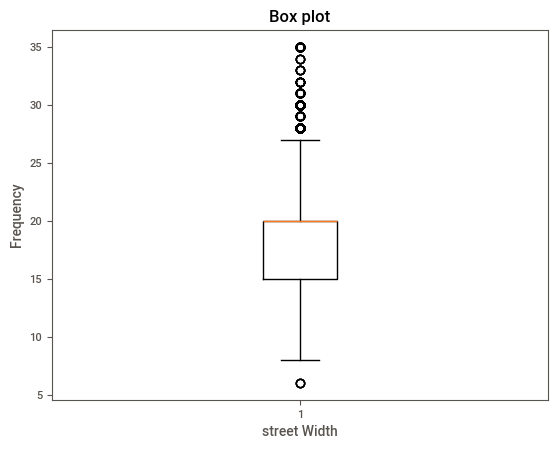

In [445]:
plt.boxplot(df['streetWidth'])
plt.xlabel('street Width')
plt.ylabel('Frequency')
plt.title(f'Box plot')
plt.show()

In [443]:
df = df[(df['streetWidth'] <= 35.5) & (df['streetWidth'] >= 5.5)]

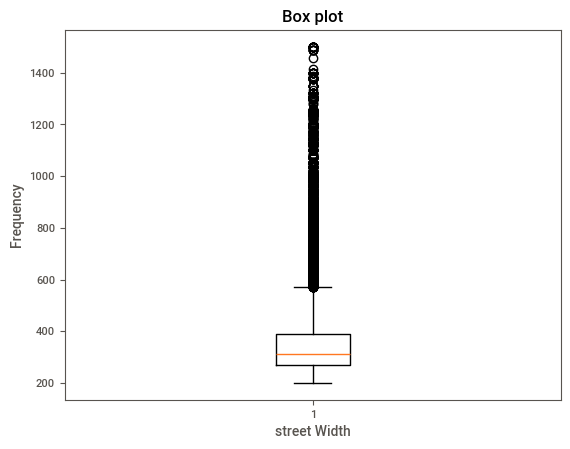

In [483]:
plt.boxplot(df['space'])
plt.xlabel('street Width')
plt.ylabel('Frequency')
plt.title(f'Box plot')
plt.show()

In [481]:
df = df[(df['space'] <= 1500) & (df['space'] >= 200)]

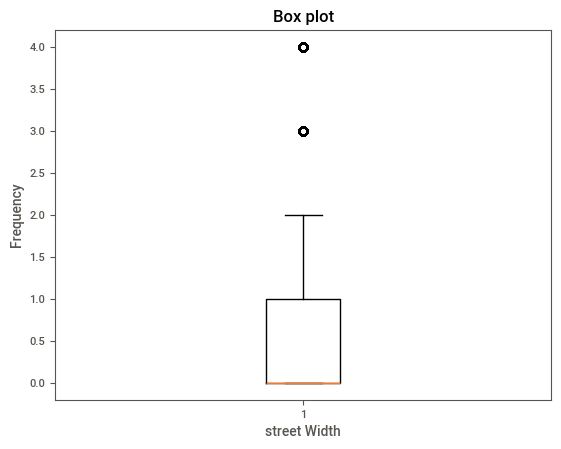

In [495]:
plt.boxplot(df['apartments'])
plt.xlabel('street Width')
plt.ylabel('Frequency')
plt.title(f'Box plot')
plt.show()

In [493]:
df = df[(df['apartments'] <= 4.0)]

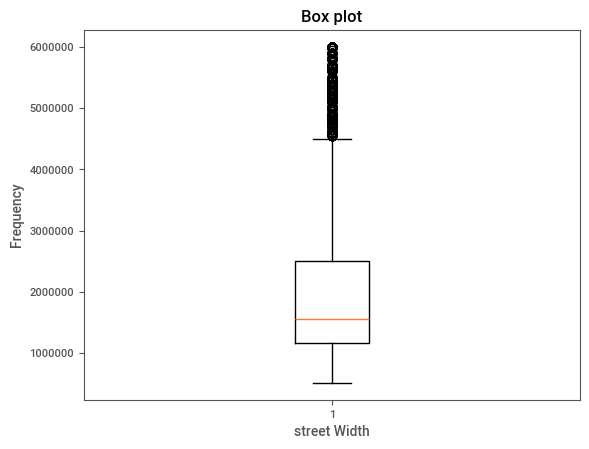

In [521]:
plt.boxplot(df['price'])
plt.xlabel('street Width')
plt.ylabel('Frequency')
plt.title(f'Box plot')
plt.show()

In [519]:
df = df[(df['price'] <= 6000000) & (df['price'] >= 510000.0)]

### Correcting errors

-------------------

In [372]:
df['lounges'] = df['lounges'].str.replace("+", '') 

In [370]:
df['bathrooms'] = df['bathrooms'].str.replace("+", '') 

In [371]:
df['apartments'] = df['apartments'].str.replace("+", '') 

In [374]:
df['apartments'] = df['apartments'].astype(float)

In [373]:
df['lounges'] = df['lounges'].astype(float)

In [375]:
df['bathrooms'] = df['bathrooms'].astype(float)

In [394]:
# df['lounges'].fillna(2.0 , inplace = True)
# df['streetWidth'].fillna(0.0 , inplace = True)
# df['price'].fillna(0.0 , inplace = True)
# df['square price'].fillna(0.0 , inplace = True)
# df['apartments'].fillna(0.0 , inplace = True)

In [428]:
# df['stairs'] = df['stairs'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['driverRoom'] = df['driverRoom'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['tent'] = df['tent'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['patio'] = df['patio'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['kitchen'] = df['kitchen'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['outdoorRoom'] = df['outdoorRoom'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['garage'] = df['garage'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['duplex'] = df['duplex'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['maidRoom'] = df['maidRoom'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['elevator'] = df['elevator'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['furnihsed'] = df['furnihsed'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['pool'] = df['pool'].map(lambda x : 'Yes' if x == 1.0 else('No' if x == 0.0 else 'Unknown'))
# df['basement'] = df['basement'].map(lambda x : 'Yes' if x == 1.0 else 'No')

## 3,4. Univariate and Bivariate/Multivariate Analysis


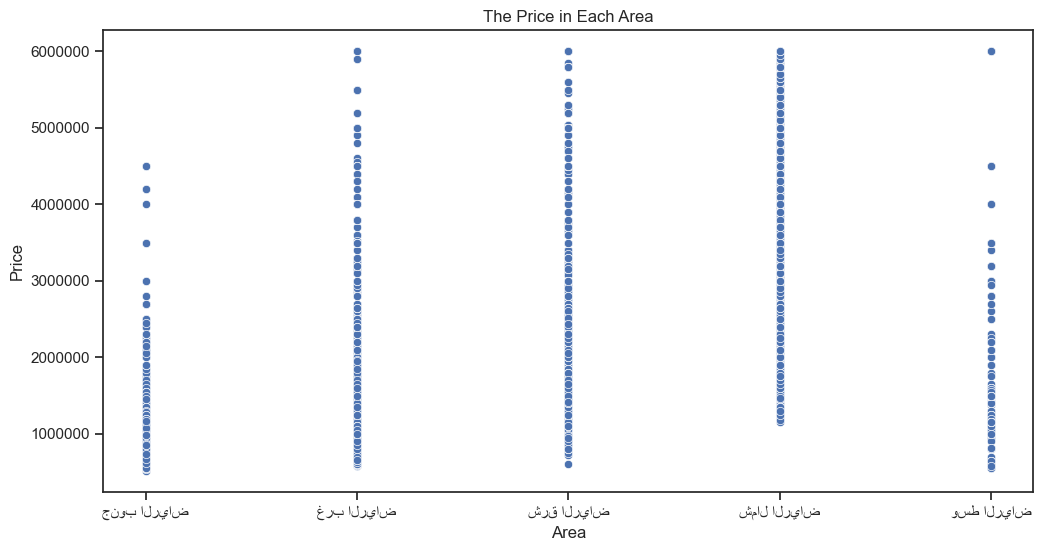

In [610]:
sns.set(style="ticks")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='location', y='price', data=df)

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('The Price in Each Area')

plt.show()

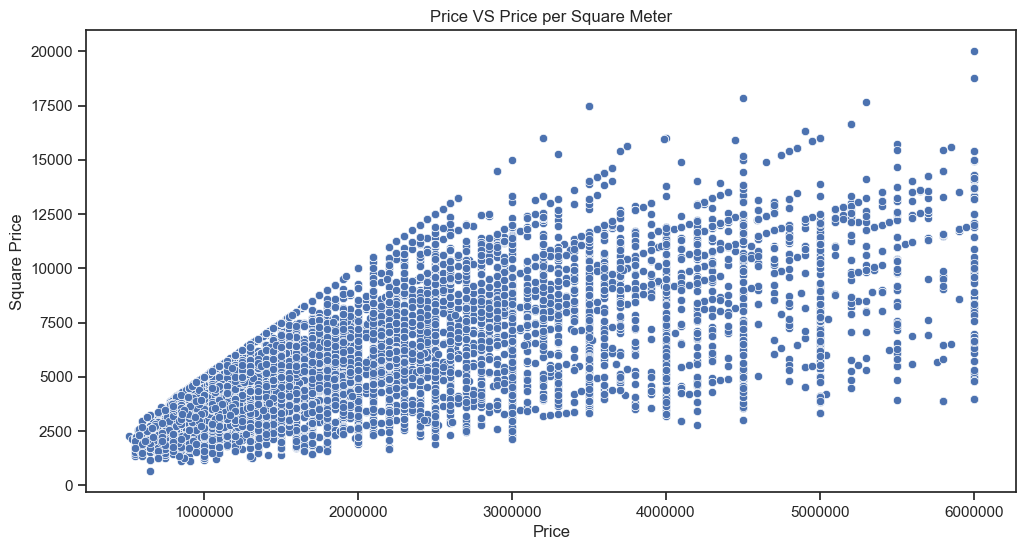

In [604]:
sns.set(style="ticks")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='square price', data=df)


plt.xlabel('Price')
plt.ylabel('Square Price')
plt.title('Price VS Price per Square Meter')

plt.show()

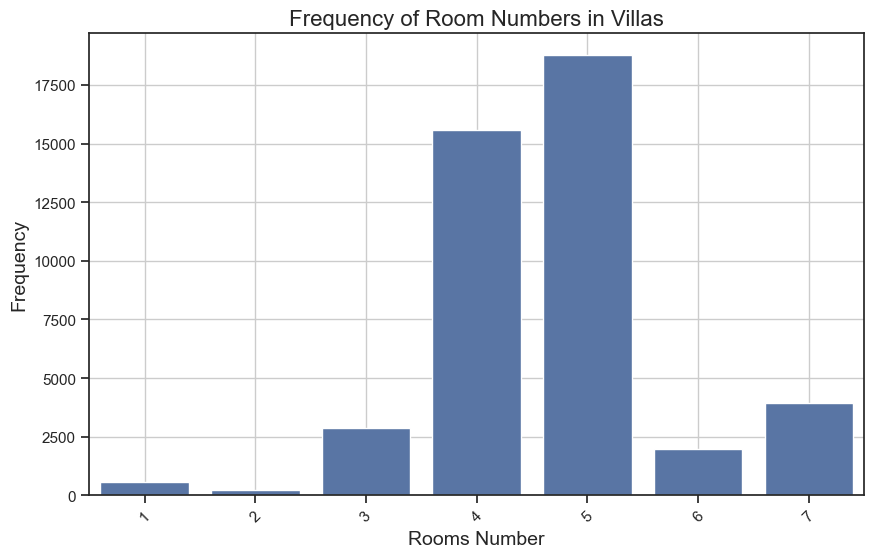

In [606]:
rooms = df['rooms'].value_counts(ascending=False)

sns.set(style="ticks")

plt.figure(figsize=(10, 6))

sns.barplot(x=rooms.index, y=rooms.values)

plt.title('Frequency of Room Numbers in Villas', fontsize=16)
plt.xlabel('Rooms Number', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=45)

plt.grid()
plt.show()

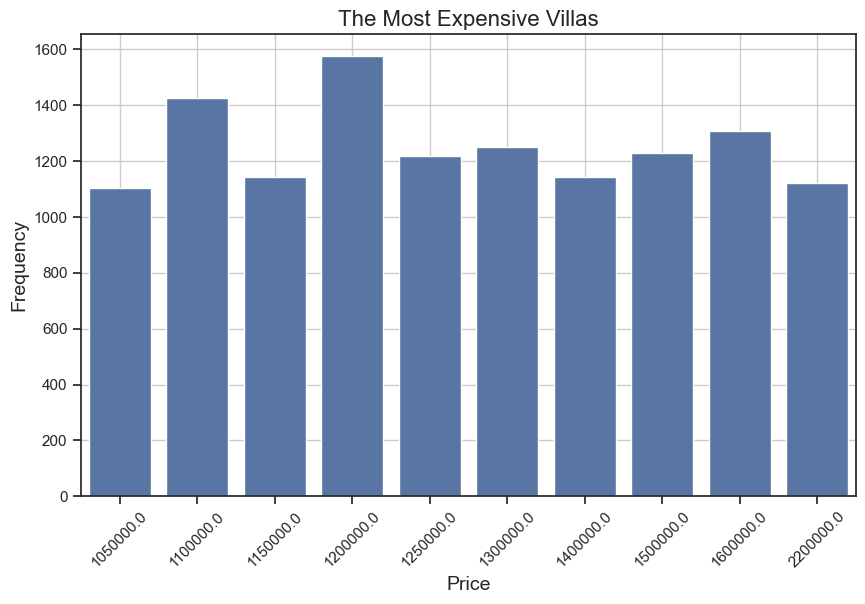

In [626]:
Price = df['price'].value_counts(ascending=False).head(10)

sns.set(style="ticks")

plt.figure(figsize=(10, 6))

sns.barplot(x=Price.index, y=Price.values)

plt.title('The Most Expensive Villas', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xticks(rotation=45)

plt.grid()
plt.show()